# Вопросы адекватности

In [31]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

## approve equation

Для датасета `loanapp` рассморим регрессию **approve на appinc, appinc^2, mortno, unem, dep, male, married, yjob, self**

In [32]:
# загрузим данные
loanapp_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/econometrica/main/econometrica2/data-csv/loanapp.csv', na_values=(' ', '', '  '))
loanapp_df.shape

(1989, 59)

In [33]:
#зададим спецификацию модели через формулу и подгоним модель с поправкой на гетероскедастичность
res_lpm_hc = smf.ols(formula='approve~appinc+I(appinc**2)+mortno+unem+dep+male+married+yjob+self', data=loanapp_df).fit(cov_type='HC3')

### Построим графики фактических наблюдений и прогнозов

In [34]:
# Предсказанные значения
res_lpm_hc.fittedvalues

1       0.878207
2       0.850387
3       0.840184
4       0.882882
5       0.847879
          ...   
1984    0.895199
1985    0.986773
1986    0.845125
1987    0.889395
1988    0.807187
Length: 1971, dtype: float64

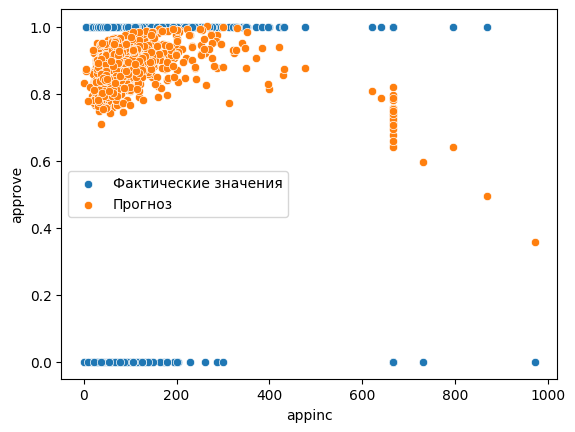

In [35]:
sns.scatterplot(data=loanapp_df, x='appinc', y='approve', label='Фактические значения');
sns.scatterplot(data=loanapp_df, x='appinc', y=res_lpm_hc.fittedvalues, label='Прогноз');

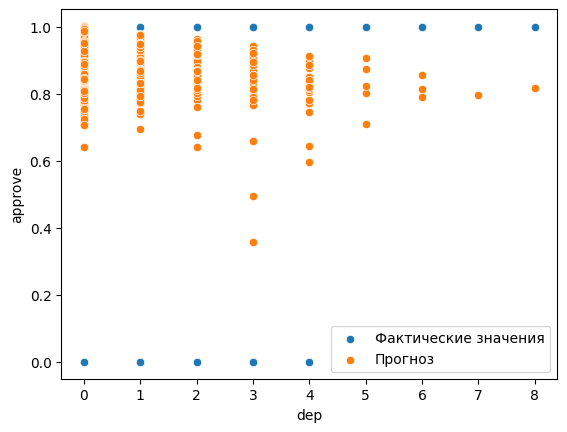

In [36]:
sns.scatterplot(data=loanapp_df, x='dep', y='approve', label='Фактические значения');
sns.scatterplot(data=loanapp_df, x='dep', y=res_lpm_hc.fittedvalues, label='Прогноз');

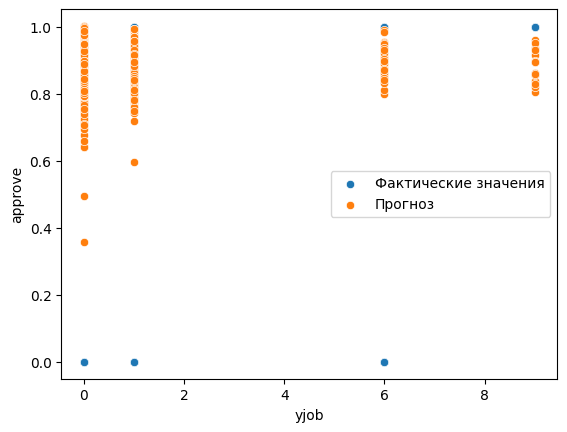

In [37]:
sns.scatterplot(data=loanapp_df, x='yjob', y='approve', label='Фактические значения');
sns.scatterplot(data=loanapp_df, x='yjob', y=res_lpm_hc.fittedvalues, label='Прогноз');